In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('steam-200k.csv', header=None).drop(4,axis=1)
df.columns = ['user', 'game', 'action', 'hours']

In [3]:
df[:10]

,user,game,action,hours
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0
5,151603712,Spore,play,14.9
6,151603712,Fallout New Vegas,purchase,1.0
7,151603712,Fallout New Vegas,play,12.1
8,151603712,Left 4 Dead 2,purchase,1.0
9,151603712,Left 4 Dead 2,play,8.9


In [4]:
df = df[df['action'] == 'play'].copy()

In [5]:
userbyitem = pd.DataFrame(index=df['user'].unique(), columns=df['game'].unique())

In [6]:
for i in range(len(df)):
    user = df.iloc[i]['user']
    game = df.iloc[i]['game']
    userbyitem.loc[user,game] = df.iloc[i]['hours']

In [7]:
userbyitem.to_csv('userbyitem.csv', index=True)

In [8]:
ubyi = pd.read_csv('userbyitem.csv', index_col=0)
ubyi[:10]

,The Elder Scrolls V Skyrim,Fallout 4,Spore,Fallout New Vegas,Left 4 Dead 2,HuniePop,Path of Exile,Poly Bridge,Left 4 Dead,Team Fortress 2,...,Adventure Time Explore the Dungeon Because I DONT KNOW!,Ride! Carnival Tycoon,SAMURAI WARRIORS 4-II,The Bug Butcher,Romance of the Three Kingdoms Maker,Space Colony,Life is Hard,Executive Assault,O.R.B.,MirrorMoon EP
151603712,273.0,87.0,14.9,12.1,8.9,8.5,8.1,7.5,3.3,2.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187131847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59945701,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53875128,NaN,NaN,0.5,7.5,71.0,NaN,NaN,NaN,1.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140954425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26122540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176410694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197278511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150128162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197455089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


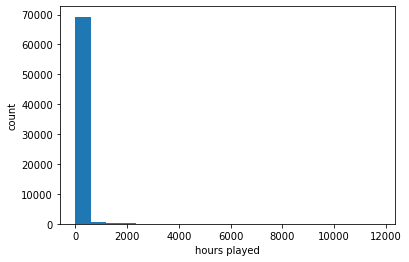

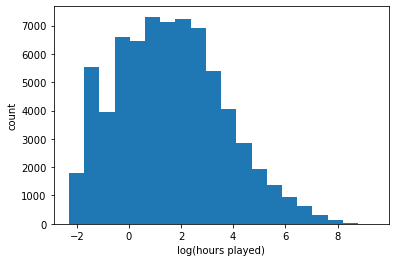

In [9]:
plt.hist(ubyi.values.flatten(), bins=20)
plt.xlabel('hours played')
plt.ylabel('count')
plt.show()
plt.hist(np.log(ubyi.values.flatten()), bins=20)
plt.xlabel('log(hours played)')
plt.ylabel('count')
plt.show()

In [10]:
#log transform the data
ubyi_norm = np.log(ubyi)
#add the absolute value of the min value so that the data goes to an all positive scale
#this essentially turns the data into a 0 to 10 scale
ubyi_norm += abs(ubyi_norm.min().min())
print(ubyi_norm.min().min(), ubyi_norm.max().max())
#take out users that haven't rated at least 3 games
ubyi_norm = ubyi_norm[(~ubyi_norm.isnull()).sum(axis=1) >= 3]

0.0 11.674533980166641


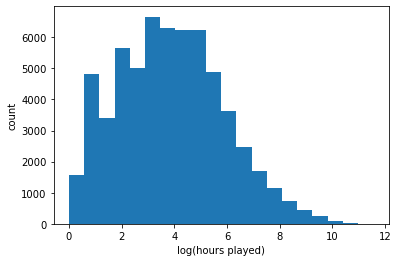

In [11]:
#visualizing the data normalized
plt.hist(ubyi_norm.values.flatten(), bins=20)
plt.xlabel('log(hours played)')
plt.ylabel('count')
plt.show()

In [12]:
item_corr = pd.DataFrame(index=ubyi_norm.columns.values, 
                         columns=ubyi_norm.columns.values)

In [22]:
i = 0
for item1 in item_corr.index.values:
    for item2 in item_corr.columns.values:
        if item1 == item2:
            continue
    if not np.isnan(item_corr.loc[item1, item2]):
      #if the matrix value is already filled out, we don't need to calculate again
        continue
    #calculation correlation between two item vectors
    a = ubyi_norm[item1].values
    b = ubyi_norm[item2].values
    empty = ~np.logical_or(np.isnan(a), np.isnan(b))
    a=np.compress(empty,a)
    b=np.compress(empty,b)
    if(len(a) < 10):
      #if items have less than 50 items in common, just leave it NA
      #pearson similarity doesn't have much meaning in those cases
        continue
    corr = np.corrcoef(a,b)[0,1]
    item_corr.loc[item1,item2] = corr
    item_corr.loc[item2,item1] = corr


In [23]:
item_corr

,The Elder Scrolls V Skyrim,Fallout 4,Spore,Fallout New Vegas,Left 4 Dead 2,HuniePop,Path of Exile,Poly Bridge,Left 4 Dead,Team Fortress 2,...,Adventure Time Explore the Dungeon Because I DONT KNOW!,Ride! Carnival Tycoon,SAMURAI WARRIORS 4-II,The Bug Butcher,Romance of the Three Kingdoms Maker,Space Colony,Life is Hard,Executive Assault,O.R.B.,MirrorMoon EP
The Elder Scrolls V Skyrim,NaN,0.080771,0.161580,0.344387,0.092570,-0.121787,0.031917,NaN,0.267262,0.138459,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fallout 4,0.080771,NaN,0.274412,-0.020629,0.002675,NaN,0.538123,NaN,-0.113213,-0.030488,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spore,0.161580,0.274412,NaN,-0.081501,0.188447,NaN,NaN,NaN,-0.261945,0.025327,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fallout New Vegas,0.344387,-0.020629,-0.081501,NaN,-0.033310,NaN,0.099573,NaN,-0.031939,0.037129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Left 4 Dead 2,0.092570,0.002675,0.188447,-0.033310,NaN,NaN,0.162879,NaN,0.516372,0.234290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Space Colony,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Life is Hard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Executive Assault,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
O.R.B.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
item_corr.to_csv('item_corr_matrix.csv', index=True)

In [25]:
item_corr = pd.read_csv('item_corr_matrix.csv', index_col=0)

In [26]:
def recommend_a_game2(user):
    #what game should we recommend?
    user_to_recommend = user
    user_avg = ubyi_norm.loc[user_to_recommend].mean()
    games_to_consider = ubyi_norm.loc[user_to_recommend][ubyi_norm.loc[user_to_recommend].isna()].index.values
    recommendation = None
    rec_pred_rating = -np.inf
    users_considered = None
    collab_filter_df_mem = None
    for game in games_to_consider:
        #get list of games that user has played
        played = pd.DataFrame(ubyi_norm.loc[user][ubyi_norm.loc[user].notna()])
        played.reset_index(inplace=True)
        played.columns = ['game', 'user_rating']
        played['user_avg'] = user_avg
        played['diff'] = played['user_rating'] - played['user_avg']
        tmp_str = 'correlation_w_' + str(game)
        played[tmp_str] = played['game'].map(lambda x: item_corr.loc[x,game])
        played['abs_corr'] = played[tmp_str].map(abs)
        sum_corr = played['abs_corr'].sum()
        played['weight'] = played[tmp_str]/sum_corr
        played['weighted_diff'] = played['weight']*played['diff']
        learning = played['weighted_diff'].sum()
        predicted_rating = user_avg + learning
        #print(played.head())
        if(played['weighted_diff'].notna().sum() < len(played)/4):
          #not really meaningful if only a few games is correlated with target
          #set threshold at 25% of games
            continue
        if(predicted_rating > rec_pred_rating):
            recommendation = game
            rec_pred_rating = predicted_rating
            collab_filter_df_mem = played
    print('We recommend {0} with a predicted rating of {1}!'.format(recommendation, rec_pred_rating))
    return collab_filter_df_mem

In [27]:
tmp = recommend_a_game2(148510973)
tmp

We recommend Medieval II Total War Kingdoms with a predicted rating of 7.608371705064537!


,game,user_rating,user_avg,diff,correlation_w_Medieval II Total War Kingdoms,abs_corr,weight,weighted_diff
0,The Elder Scrolls V Skyrim,6.593045,4.082735,2.510310,0.633011,0.633011,0.524330,1.316231
1,Left 4 Dead 2,3.178054,4.082735,-0.904681,NaN,NaN,NaN,NaN
2,Team Fortress 2,6.620073,4.082735,2.537339,-0.035427,0.035427,-0.029345,-0.074457
3,Counter-Strike Global Offensive,8.492900,4.082735,4.410166,0.019438,0.019438,0.016101,0.071008
4,Rocket League,1.945910,4.082735,-2.136825,NaN,NaN,NaN,NaN
5,Portal 2,1.791759,4.082735,-2.290975,NaN,NaN,NaN,NaN
6,Middle-earth Shadow of Mordor,5.393628,4.082735,1.310893,NaN,NaN,NaN,NaN
7,Assassin's Creed III,3.367296,4.082735,-0.715439,NaN,NaN,NaN,NaN
8,Unturned,4.094345,4.082735,0.011610,NaN,NaN,NaN,NaN
9,Rust,2.708050,4.082735,-1.374684,NaN,NaN,NaN,NaN


In [28]:
tmp[tmp['weight'].notna()]

,game,user_rating,user_avg,diff,correlation_w_Medieval II Total War Kingdoms,abs_corr,weight,weighted_diff
0,The Elder Scrolls V Skyrim,6.593045,4.082735,2.510310,0.633011,0.633011,0.524330,1.316231
2,Team Fortress 2,6.620073,4.082735,2.537339,-0.035427,0.035427,-0.029345,-0.074457
3,Counter-Strike Global Offensive,8.492900,4.082735,4.410166,0.019438,0.019438,0.016101,0.071008
12,Mount & Blade Warband,9.264829,4.082735,5.182094,0.516373,0.516373,0.427718,2.216474
14,Chivalry Medieval Warfare,2.639057,4.082735,-1.443677,0.003026,0.003026,0.002507,-0.003619


In [29]:
ubyi_norm.loc[53875128][ubyi_norm.loc[53875128].notna()]

Spore                             1.609438
Fallout New Vegas                 4.317488
Left 4 Dead 2                     6.565265
Left 4 Dead                       2.833213
Grand Theft Auto IV               2.708050
                                    ...   
Metro Last Light Redux            0.000000
Crimzon Clover  WORLD IGNITION    0.000000
Sonic Generations                 0.000000
Ethan Meteor Hunter               0.000000
Reus                              0.000000
Name: 53875128, Length: 197, dtype: float64